In [19]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [20]:
#Read CSV
accident_df = pd.read_csv("Resources/all.csv", encoding='windows-1254', low_memory=False)
time_df = pd.read_csv("Resources/time_bin.csv", encoding='windows-1254', low_memory=False)

In [21]:
accident_df.head()

,Unnamed: 0,Accident_Index,1st_Road_Class,Accident_Severity,Year,Date,Day_of_Week,Latitude,Light_Conditions,Local_Authority_(District),...,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Type,Was_Vehicle_Left_Hand_Drive
0,478587,201001BS70003,B,Slight,2010,2010-01-11,Monday,51.484087,Daylight,Kensington and Chelsea,...,Commuting to/from work,Mid Junction - on roundabout or on main road,CITROEN,BERLINGO FIRST 600,Petrol,Female,No tow/articulation,Turning right,Van / Goods 3.5 tonnes mgw or under,No
1,478588,201001BS70004,A,Slight,2010,2010-01-11,Monday,51.509212,Darkness - lights lit,Kensington and Chelsea,...,Journey as part of work,Mid Junction - on roundabout or on main road,RENAULT,SCENIC DYN DCI 130,Heavy oil,Male,No tow/articulation,Going ahead other,Car,No
2,478589,201001BS70007,Unclassified,Slight,2010,2010-01-02,Saturday,51.513314,Darkness - lights lit,Kensington and Chelsea,...,Other/Not known (2005-10),Mid Junction - on roundabout or on main road,NISSAN,PRIMERA SVE CVT,Petrol,Female,No tow/articulation,Going ahead right-hand bend,Car,No
3,478590,201001BS70007,Unclassified,Slight,2010,2010-01-02,Saturday,51.513314,Darkness - lights lit,Kensington and Chelsea,...,Other/Not known (2005-10),Mid Junction - on roundabout or on main road,MERCEDES,A140 ELEGANCE,Petrol,Female,No tow/articulation,Going ahead other,Car,No
4,478591,201001BS70008,A,Slight,2010,2010-01-04,Monday,51.484361,Darkness - lights lit,Kensington and Chelsea,...,Journey as part of work,Mid Junction - on roundabout or on main road,VAUXHALL,ZAFIRA ELEGANCE DTI,Heavy oil,Male,No tow/articulation,Turning right,Taxi/Private hire car,No


In [22]:
accident_df.shape

(1077653, 33)

In [23]:
time_df.head()

,Index,Year,Date,Day,Time,Severity,Casualties,Location,Gender,Time_f,Time_Bin
0,201001BS70003,2010,2010-01-11,Monday,07:30,Slight,1,Mid Junction - on roundabout or on main road,Female,7,Morning Commute
1,201001BS70004,2010,2010-01-11,Monday,18:35,Slight,1,Mid Junction - on roundabout or on main road,Male,18,Evening Commute
2,201001BS70007,2010,2010-01-02,Saturday,21:21,Slight,1,Mid Junction - on roundabout or on main road,Female,21,Late PM
3,201001BS70007,2010,2010-01-02,Saturday,21:21,Slight,1,Mid Junction - on roundabout or on main road,Female,21,Late PM
4,201001BS70008,2010,2010-01-04,Monday,20:35,Slight,1,Mid Junction - on roundabout or on main road,Male,20,Late PM


In [24]:
#Create DataFrame for Accidents in Birmingham
birmingham_df = accident_df.loc[accident_df['Local_Authority_(District)'] == "Birmingham"]
birmingam_df = pd.DataFrame(birmingham_df)
birmingham_df.head()

,Unnamed: 0,Accident_Index,1st_Road_Class,Accident_Severity,Year,Date,Day_of_Week,Latitude,Light_Conditions,Local_Authority_(District),...,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Type,Was_Vehicle_Left_Hand_Drive
55941,534528,201020D002713,Unclassified,Slight,2010,2010-01-03,Sunday,52.482901,Daylight,Birmingham,...,Other/Not known (2005-10),Mid Junction - on roundabout or on main road,NISSAN,PRIMERA S TD,Heavy oil,Male,No tow/articulation,Reversing,Car,No
55942,534529,201020D004613,Unclassified,Slight,2010,2010-01-02,Saturday,52.473343,Darkness - lights lit,Birmingham,...,Other/Not known (2005-10),Not at or within 20 metres of junction,NISSAN,MICRA SLX,Petrol,Male,No tow/articulation,Parked,Car,No
55943,534530,201020D006513,Unclassified,Slight,2010,2010-01-04,Monday,52.470252,Daylight,Birmingham,...,Other/Not known (2005-10),Not at or within 20 metres of junction,PEUGEOT,206 SW XT,Petrol,Male,No tow/articulation,Waiting to go - held up,Car,No
55944,534531,201020D006913,Unclassified,Slight,2010,2010-01-05,Tuesday,52.477604,Darkness - lights lit,Birmingham,...,Other/Not known (2005-10),Approaching junction or waiting/parked at junc...,AUDI,A3 SPECIAL EDITION,Petrol,Male,No tow/articulation,Going ahead other,Car,No
55945,534532,201020D008813,Unclassified,Slight,2010,2010-01-05,Tuesday,52.484683,Darkness - lights lit,Birmingham,...,Other/Not known (2005-10),Approaching junction or waiting/parked at junc...,PEUGEOT,406 L HDI (90),Heavy oil,Male,No tow/articulation,Slowing or stopping,Car,No


In [25]:
birmingham_df.shape

(21504, 33)

**Main Findings and Conclusions:**

The greatest number of fatal accidents take place at 5pm, and the greatest number of total accidents also occur at 5pm. This is presumably due to the after work commute, and where people may be tired and in a rush to get back home. There is also a peak in number of accidents at 8am where people may be commuting to work or dropping children off to school, so there will be more vehicles on the road, leading to an increased risk of accidents occuring. 
The least number of accidents including fatal accidents occur at 4am, where the least number of vehicles may be on the road.

In [26]:
#Calculate average number of casualties for speed limit
birmingham_df.groupby('Speed_limit')['Number_of_Casualties'].mean()

Speed_limit
20    1.317241
30    1.483629
40    1.615962
50    2.006061
60    1.652174
70    1.764092
Name: Number_of_Casualties, dtype: float64

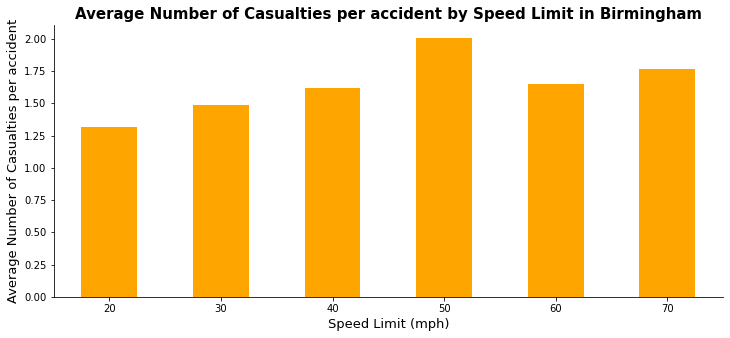

In [27]:
#Plot results for birmingham
birmingham_df.groupby('Speed_limit')['Number_of_Casualties'].mean().plot(kind='bar', color='orange', figsize=(12,5))
plt.xticks(rotation='horizontal')
plt.xlabel('Speed Limit (mph)', fontsize=13)
plt.ylabel('Average Number of Casualties per accident', fontsize=13)
plt.title('Average Number of Casualties per accident by Speed Limit in Birmingham', fontsize=15, fontweight='bold')
sns.despine(top=True, right=True);
plt.savefig('Images/Average_casualties_Birmingham.png')

In [28]:
mean_casualties = accident_df.groupby('Speed_limit')['Number_of_Casualties'].mean()

In [29]:
mean_casualties

Speed_limit
10    1.000000
15    1.000000
20    1.247302
30    1.359357
40    1.555149
50    1.653223
60    1.646950
70    1.824399
Name: Number_of_Casualties, dtype: float64

In [65]:
# Perform pearson correlation coefficient test for UK accidents and speed limit
casualties = accident_df['Number_of_Casualties']
speed = accident_df['Speed_limit']
corr_uk, _ = st.pearsonr(speed, casualties)
print(f"The correlation between Speed Limit and total number of casualties in the UK is: {round(corr_uk, 2)}")



The correlation between Speed Limit and total number of casualties in the UK is: 0.15


In [70]:
# Perform pearson correlation coefficient test for birmingham
casualties_birmingham = birmingham_df['Number_of_Casualties']
speed_birmingham = birmingham_df['Speed_limit']

corr_birmingham, _ = st.pearsonr(speed_birmingham, casualties_birmingham)
print(f"The correlation between Speed Limit and total number of casualties in Birmingham is: {round(corr_birmingham, 2)}")

The correlation between Speed Limit and total number of casualties in Birmingham is: 0.07


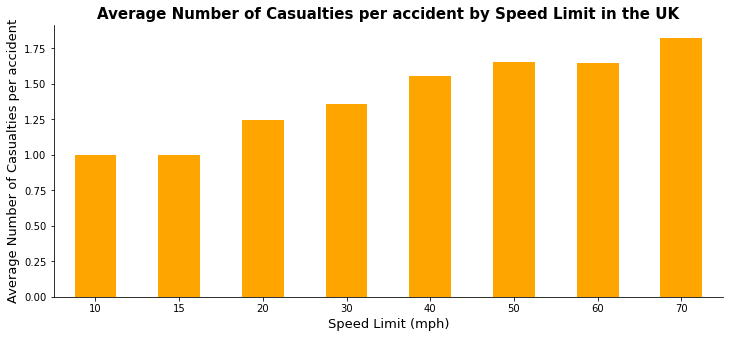

In [56]:
#Repeat graph for UK
accident_df.groupby('Speed_limit')['Number_of_Casualties'].mean().plot(kind='bar', color='orange', figsize=(12,5))
plt.xticks(rotation='horizontal')
plt.xlabel('Speed Limit (mph)', fontsize=13)
plt.ylabel('Average Number of Casualties per accident', fontsize=13) 
plt.title('Average Number of Casualties per accident by Speed Limit in the UK', fontsize=15, fontweight='bold')
sns.despine(top=True, right=True);
plt.savefig('Images/Average_casualties_UK.png')

**Main Findings and Conclusions:**

From the bar plots, we can conclude that there are more average casualties resulting from accidents in 30mph zones in Birmingham. This may be due to the fact that most areas in birmingham have a 30mph speed limit, so there seems to be fewer average casualties resulting from accidnets in 40 and 50mph zones compared to 30mph.
For the whole of the UK, the greatest number of casualties occur in 70mph zones. 
Generally, for the 'Average Number of Casualties by Speed Limit in the UK'  bar plot the greater the speed limit where an accident occured the greater average number of casualties.

In [57]:
accident_df['Date']= pd.to_datetime(accident_df['Date'], format='%Y-%m-%d')
                                  

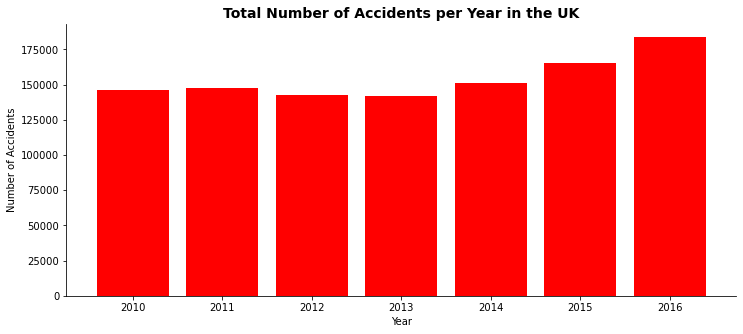

In [58]:
# Get yearly count for UK
years = accident_df['Date'].dt.year.value_counts().sort_index(ascending=False)

# Create bar graph
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(years.index, years.values, color='red')
ax.set_title('Total Number of Accidents per Year in the UK', fontsize=14, fontweight='bold')
ax.set(xlabel='Year')
ax.set(ylabel='Number of Accidents')

# Remove border
sns.despine(ax=ax, top=True, right=True);
plt.savefig('Images/Total_accidents_UK.png')

In [59]:
birmingham_df['Date']= pd.to_datetime(birmingham_df['Date'], format='%Y-%m-%d')

<ipython-input-59-42e762b74e54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  birmingham_df['Date']= pd.to_datetime(birmingham_df['Date'], format='%Y-%m-%d')


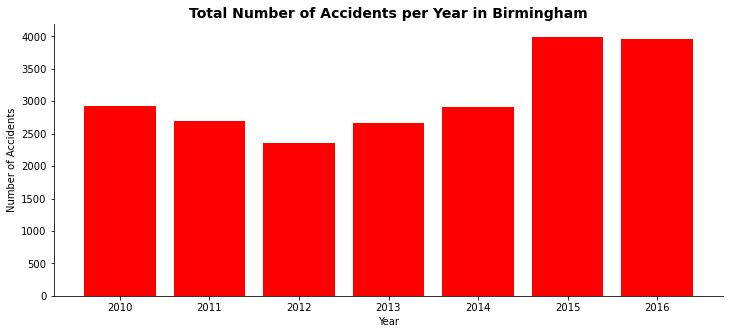

In [60]:
# Get yearly count for UK
yearly_count = birmingham_df['Date'].dt.year.value_counts().sort_index(ascending=False)

# Create bar graph
fig, ax = plt.subplots(figsize=(12,5))
ax.bar(yearly_count.index, yearly_count.values, color='red')
ax.set_title('Total Number of Accidents per Year in Birmingham', fontsize=14, fontweight='bold')
ax.set(xlabel='Year')
ax.set(ylabel='Number of Accidents')

# Remove border
sns.despine(ax=ax, top=True, right=True);
plt.savefig('Images/Total_accidents_Birmingham.png')

**Main Findings and Conclusions:**

From the UK number of accidents bar plot, we can see that 2016 resulted in the greatest number of accidents. However, there isn't an overall significant difference in number of accidents between the plotted years.
In Birmingham, the most accidents also occurred in 2015, and there was an increase in accidents from 2012 to 2015. From 2010 to 2012 in Birmingham there was a decrease in number of accidents.

In [36]:
#Calculate casualties by hour and day and create dataframe
casualties_by_hour = time_df.groupby(['Day','Time_f']).sum()['Casualties'].to_frame()
#Create pivot table of casualties, hour and day
casualties_by_hour_table = casualties_by_hour.pivot_table(values=['Casualties'], index=['Time_f'], columns=['Day'], aggfunc='mean')

In [37]:
#Rename Index as hour
casualties_by_hour_table.rename_axis('Hour')


Casualties                                                  
Day      Friday Monday Saturday Sunday Thursday Tuesday Wednesday
Hour                                                             
0          2332   2103     5234   5908     2067    1667      1641
1          1561   1393     3977   4704     1193    1029       900
2          1173    795     3018   3567      808     635       646
3           990    742     2413   3093      831     646       615
4           745    687     1817   2103      612     597       588
5          1583   1573     1820   1803     1420    1501      1431
6          3974   4480     2313   2182     4271    4827      4343
7         10313  11180     4685   2683    15025   12139     12509
8         17723  19629     5807   3352    20853   21362     21269
9         11144  11822     8492   5904    12103   12979     12134
10        10478   9787    12542   9329     9675    9668     10016
11        12454  11222    16786  12354    11035   10729     10721
12        15025  12562    18078  15016    12357   11996     12254
13        16314  13006    18363  15266    12980   12074     12513
14        17178  13567    16545  14640    13752   12813     13033
15        22596  17311    14955  13983    17751   16949     18027
16        24535  19929    15440  14446    21422   20515     20559
17        24490  21849    15322  13086    24591   24622     24145
18        19272  15814    13984  11492    17824   17560     17357
19        14781  10006    11738   9567    12251   11377     11760
20        10550   7635     8563   7365     8605    7892      8067
21         8170   5726     6830   6098     6549    6106      6227
22         7303   4700     6995   4792     5829    4973      5299
23         6335   3095     6386   3575     3748    2962      3430

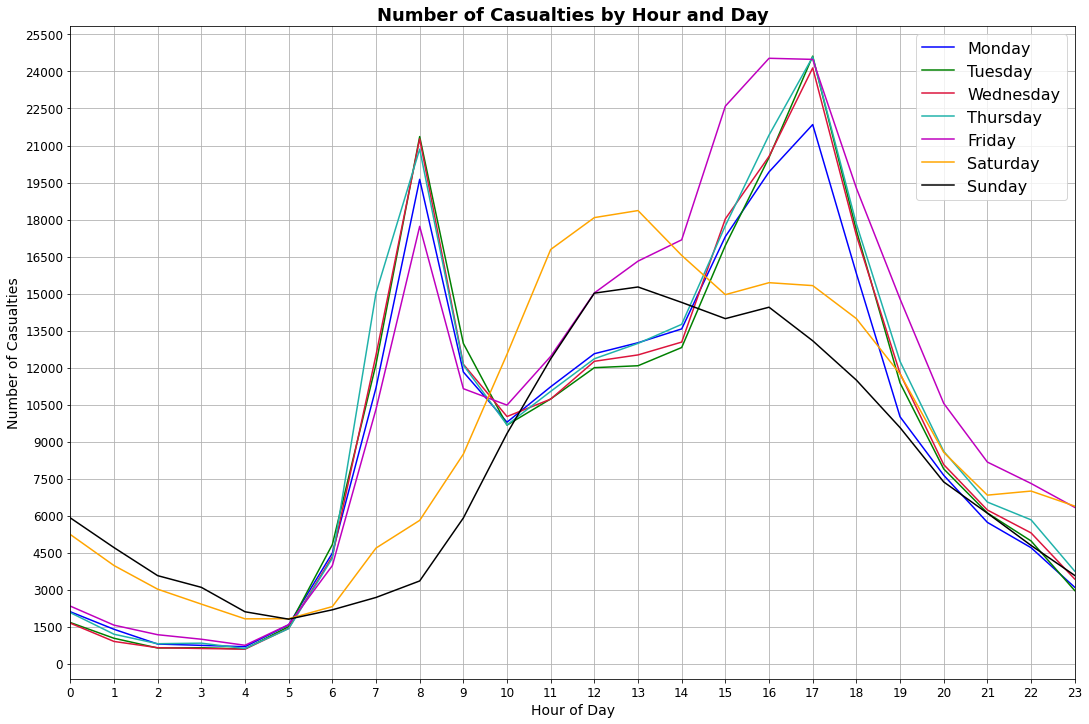

In [39]:
plt.figure(figsize=(18,12))
#Set hours as x_axis
xaxis = casualties_by_hour_table.index

#Set columns as pivot table order
casualties_by_hour_table.columns = ['Friday','Monday','Saturday','Sunday', 'Thursday', 'Tuesday','Wednesday']
#Plot days as different colours
plt.plot(xaxis, casualties_by_hour_table['Monday'], color='b', label='Monday')
plt.plot(xaxis, casualties_by_hour_table['Tuesday'], color='g', label='Tuesday')
plt.plot(xaxis, casualties_by_hour_table['Wednesday'], color='crimson', label='Wednesday')
plt.plot(xaxis, casualties_by_hour_table['Thursday'], color='lightseagreen', label='Thursday')
plt.plot(xaxis, casualties_by_hour_table['Friday'], color='m', label='Friday')
plt.plot(xaxis, casualties_by_hour_table['Saturday'], color='orange', label='Saturday')
plt.plot(xaxis, casualties_by_hour_table['Sunday'], color='k', label='Sunday')

# Set y-axis
steps = 1500
maximum = 25500
y_axis = np.arange(0.0, maximum+steps, steps)

# Format axes and set labels
plt.xticks(np.arange(len(xaxis)), xaxis, fontsize=12)
plt.yticks(y_axis, fontsize=12)
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Number of Casualties', fontsize=14)
plt.margins(x=0)
plt.grid(True)
#Plot legend and title
plt.legend(fontsize=16, loc='best')
plt.title("Number of Casualties by Hour and Day", fontsize=18, fontweight='bold')
plt.savefig('Images/Casualties_by_day.png')
plt.show()

**Main Findings and Conclusions:**

The weekdays Monday to Thurday follow the same trend where there is a spike in number of casualties at 8am and also again at 5pm. Friday also follows this trend however, seems to have a greater number of casualties from 10am until 4pm where it reaches a peak. This increase could be due to these hours being the time when people are often commuting too and from work.
The number of casualties vs the hour of day follows a different trend on saturday and sundays in comparison with weekdays. This is expected as not many people will be working on the weekend, which may mean a reduced number of vehicles on the road. The greatest number of causalties on the weekend are between the hours of 11am and 1pm, as opposed to 8am and 5pm on weekdays. 

In [40]:
#Assign hours
time=24
#Create empty lists for subplots
all_accidents = []
hours = []
fatal_accidents = []

#Create loop to detemine hour and accidents
for hour in range(time):
    hours.append(hour)
    fatal_accident_time = len(time_df[(time_df['Severity'] == "Fatal") & (time_df['Time_f'] == hour)]) 
    all_accidents_hour = len(time_df[time_df['Time_f'] == hour])
    all_accidents.append(all_accidents_hour)
    fatal_accidents.append(fatal_accident_time)

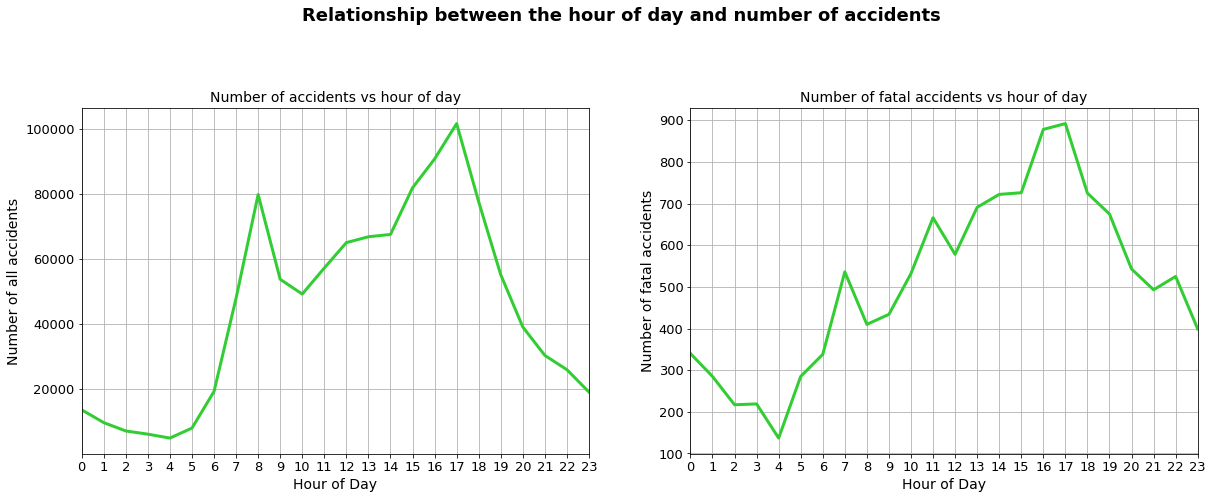

In [41]:
fig = plt.figure(figsize=(20, 14))    

#plot figure for all accidents
ax1 = fig.add_subplot(2,2,1)
ax1.plot(hours, all_accidents, color = 'limegreen', linewidth=3.0)
ax1.set_xlabel('Hour of Day', fontsize=14)
ax1.set_ylabel('Number of all accidents', fontsize=14)
ax1.set_title('Number of accidents vs hour of day', fontsize=14)
plt.xticks(np.arange(len(xaxis)), xaxis, fontsize=13)
plt.yticks(fontsize=13)
ax1.grid(True)
plt.margins(x=0)      

        
#Plot figure for fatal accidents
ax2 = fig.add_subplot(2,2,2)
ax2.plot(hours, fatal_accidents, color ='limegreen', linewidth=3.0)
ax2.set_xlabel('Hour of Day', fontsize=14)
ax2.set_ylabel('Number of fatal accidents', fontsize=14)
ax2.set_title('Number of fatal accidents vs hour of day', fontsize=14)
plt.xticks(np.arange(len(xaxis)), xaxis, fontsize=13)
plt.yticks(fontsize=13)
ax2.grid(True)
plt.margins(x=0)


fig.suptitle('Relationship between the hour of day and number of accidents', fontsize=18, fontweight='bold')
plt.savefig('Images/Fatal_accidents_with_hour.png')
plt.show()


**Main Findings and Conclusions:**

The greatest number of fatal accidents take place at 5pm, and the greatest number of total accidents also occur at 5pm. This is presumably due to the after work commute, and where people may be tired and in a rush to get back home. There is also a peak in number of accidents at 8am where people may be commuting to work or dropping children off to school, so there will be more vehicles on the road, leading to an increased risk of accidents occuring. 
The least number of accidents including fatal accidents occur at 4am, where the least number of vehicles may be on the road.

In [66]:
# Perform pearson correlation coefficient test for all accidents
corr_acc, _ = st.pearsonr(hours, all_accidents)
print(f"The correlation between Hour of day and number of accidents is: {round(corr_acc, 2)}")

The correlation between Hour of day and number of accidents is: 0.47


In [67]:
# Perform pearson correlation coefficient test for fatal accidents
corr_fatal, _ = st.pearsonr(hours, fatal_accidents)
print(f"The correlation between Hour of day and number of fatal accidents is: {round(corr_fatal, 2)}")

The correlation between Hour of day and number of fatal accidents is: 0.65
